## Gesture Recognition
Gestures have recently become attractive for spontaneous interaction with consumer electronics and mobile devices in the
context of pervasive computing”. The aim is to provide efficient personalized gesture recognition on
wide range of devices.
To achieve this, Liu et al. (2009) uses a single three-axis accelerometer to collect data from eight users
to characterize eight gesture patterns. The library, uWaveGestureLibrary, consists over 4000 instances
each of which has the accelerometer readings in three dimensions (i.e. x, y and z). Eight gestures are
illustrated in Figure 1.
The dataset is provided in the following link:
https://drive.google.com/drive/u/1/folders/13553neknux7U8why55KM1WrjgkA9IJKm

In this project our aim is to visualize and test the eight class of gestures and represent the gesture information with few numbers.
                                                                                                    
                                                                                                    Alperen Köksal


In [32]:
library(data.table,quietly = TRUE,warn.conflicts = FALSE)
library(ggplot2,quietly = TRUE,warn.conflicts = FALSE)
library(lubridate,quietly = TRUE,warn.conflicts = FALSE)
library(forecast,quietly = TRUE,warn.conflicts = FALSE)
library(urca,quietly = TRUE,warn.conflicts = FALSE)
library(plotly,quietly = TRUE,warn.conflicts = FALSE)
library(scatterplot3d,quietly = TRUE,warn.conflicts = FALSE)
library(rpart,quietly = TRUE,warn.conflicts = FALSE)
library(rattle,quietly = TRUE,warn.conflicts = FALSE)

### Part 1
This function is created to manipulate the gesture data to have a more useful dataset

In [24]:
setwd("C:/Users/a_kok/Desktop/Dersler/IE 48B/HW1")
manipulator <- function(gest)
{
setnames(gest,"V1","class")
gest=gest[order(class)]
gest[,class:=as.character(class)]
gest[,id:=1:.N]
long_gest=melt(gest,id.vars=c('id','class'))
long_gest[,time:=as.numeric(gsub("\\D", "", variable))-1]
long_gest=long_gest[,list(id,class,time,value)]
long_gest=long_gest[order(id,time)]
setnames(long_gest,c("id","value"),c("instance","accelaration"))
long_gest[,velocity := cumsum(accelaration),by = instance]
long_gest[,position := cumsum(velocity),by = instance]
return (long_gest)
}

In [25]:
gest_x <- fread("uWaveGestureLibrary_X_TRAIN")
gest_y <- fread("uWaveGestureLibrary_Y_TRAIN")
gest_z <- fread("uWaveGestureLibrary_Z_TRAIN")

Initial dataset for x coordinates is represented. First column is class information and from second to last column we have accelaration per time measurements.

In [26]:
head(gest_x)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,...,-0.7964140,-0.7417282,-0.6946985,-0.6476688,-0.6476688,-0.64766875,-0.64766875,-0.64766875,-0.64766875,-0.64766875
5,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,...,-0.2376337,-0.2376337,-0.2376337,-0.2376337,-0.2376337,-0.23763371,-0.23763371,-0.23763371,-0.23763371,-0.23763371
5,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,...,-0.2820107,-0.2369291,-0.1918477,-0.1467662,-0.1016848,-0.06120346,-0.05663826,-0.05546207,-0.05546207,-0.05546207
3,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,1.2072899,1.1478218,1.0943436,1.0603618,1.0531583,1.04446710,1.01898080,0.90994938,0.79101316,0.67207694
4,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,...,-1.4369826,-1.4369826,-1.4369826,-1.4369826,-1.4369826,-1.44034250,-1.45251250,-1.46844580,-1.48437920,-1.50031250
8,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,...,0.5784697,0.5877041,0.5969386,0.6061730,0.6207059,0.63523879,0.65370767,0.67217655,0.69064543,0.70911432


In [27]:
long_gest_x <- manipulator(gest_x)
long_gest_y <- manipulator(gest_y)
long_gest_z <- manipulator(gest_z)
long_gest <- merge(long_gest_x,long_gest_y,by = c("instance","class","time"))
long_gest <- merge(long_gest,long_gest_z,by = c("instance","class","time"))
setnames(long_gest,c("accelaration","velocity","position"),c("accelaration.z","velocity.z","position.z"))

This is the manipulated version of original dataset. Time velocity and position informations are calculated using original data.

In [5]:
head(long_gest)

instance,class,time,accelaration.x,velocity.x,position.x,accelaration.y,velocity.y,position.y,accelaration.z,velocity.z,position.z
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,-0.7914472,-0.7914472,-0.7914472,-1.959984,-1.959984,-1.959984,-0.2490781,-0.2490781,-0.2490781
1,1,2,-0.7914472,-1.5828944,-2.3743415,-1.959984,-3.919968,-5.879951,-0.2490781,-0.4981562,-0.7472342
1,1,3,-0.7958727,-2.3787671,-4.7531086,-1.956600,-5.876568,-11.756519,-0.2514390,-0.7495951,-1.4968294
1,1,4,-0.8100650,-3.1888321,-7.9419407,-1.945750,-7.822319,-19.578838,-0.2590101,-1.0086052,-2.5054346
1,1,5,-0.8492300,-4.0380621,-11.9800028,-1.915809,-9.738128,-29.316966,-0.2799033,-1.2885085,-3.7939431
1,1,6,-0.9034648,-4.9415269,-16.9215298,-1.874347,-11.612474,-40.929440,-0.3088358,-1.5973444,-5.3912875


Here are eight example representations of gestures each from different classes. Except 5 and 7, all others are so similar to their class example image.

Class 1 instance 105 3D Gesture Visualization

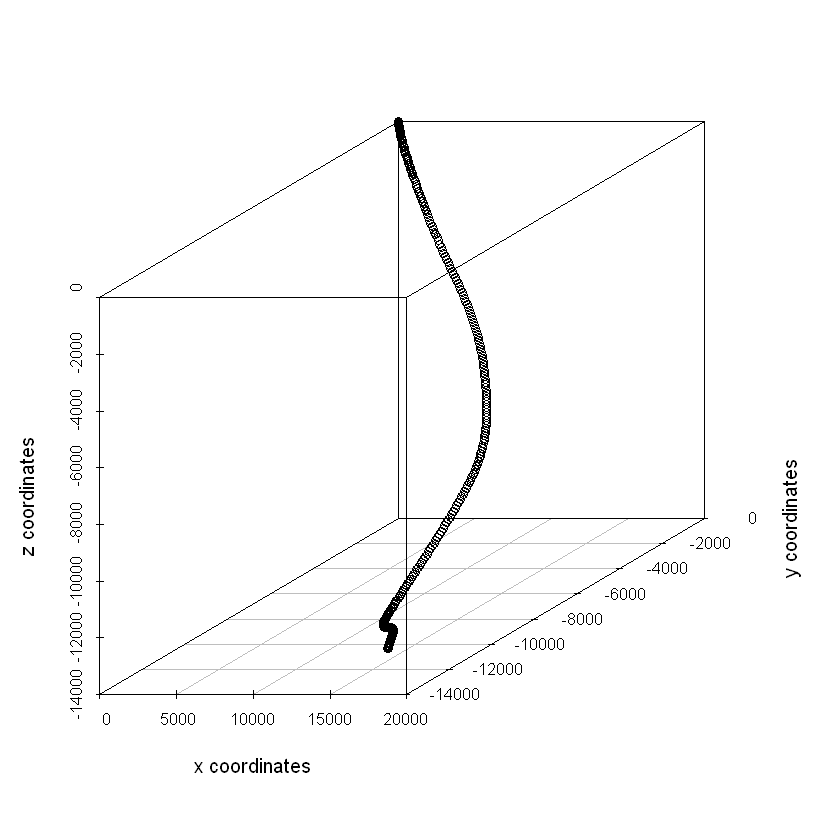

Class 2 instance 205 3D Gesture Visualization

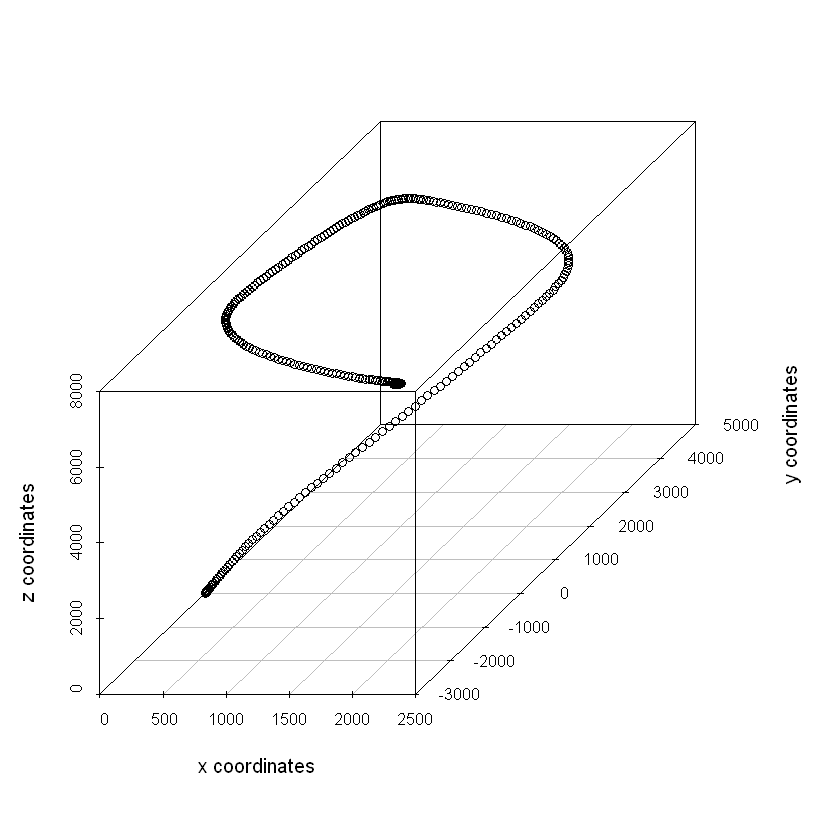

Class 3 instance 305 3D Gesture Visualization

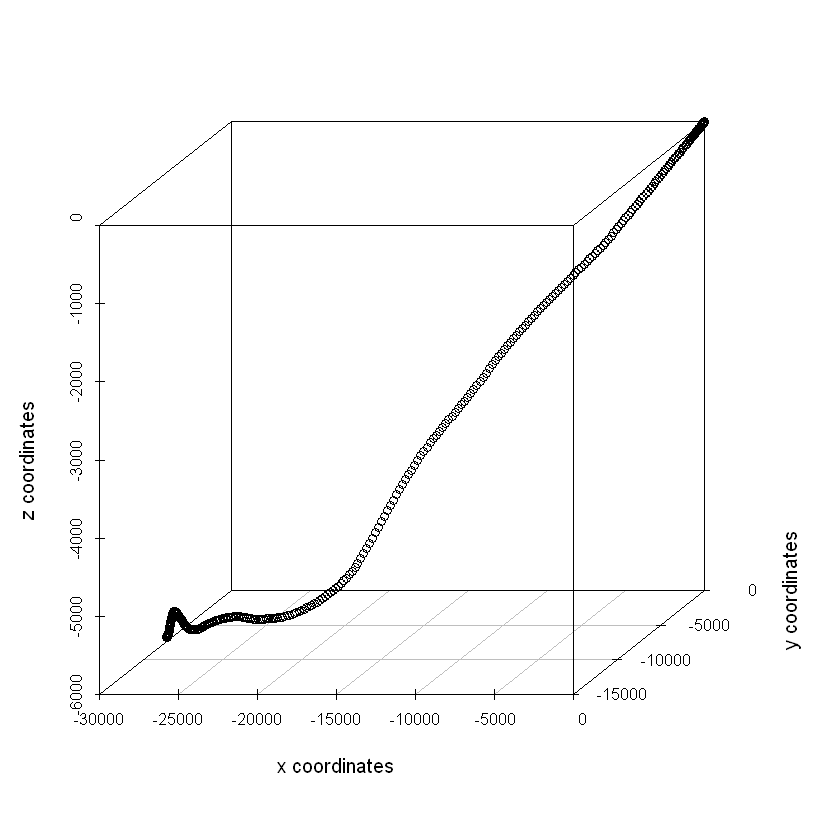

Class 4 instance 405 3D Gesture Visualization

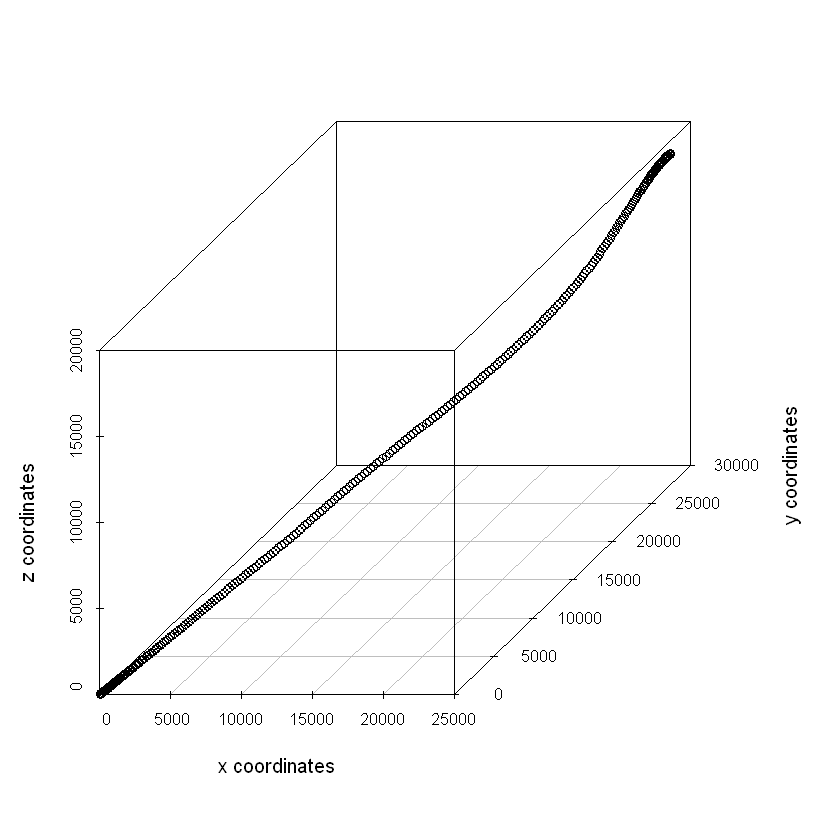

Class 5 instance 505 3D Gesture Visualization

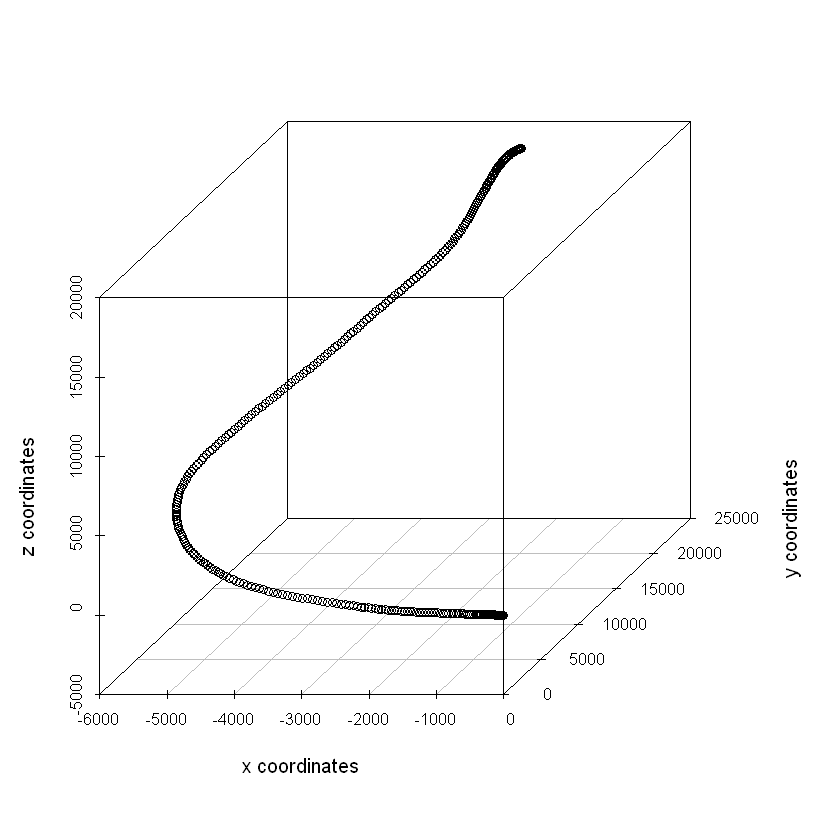

Class 6 instance 605 3D Gesture Visualization

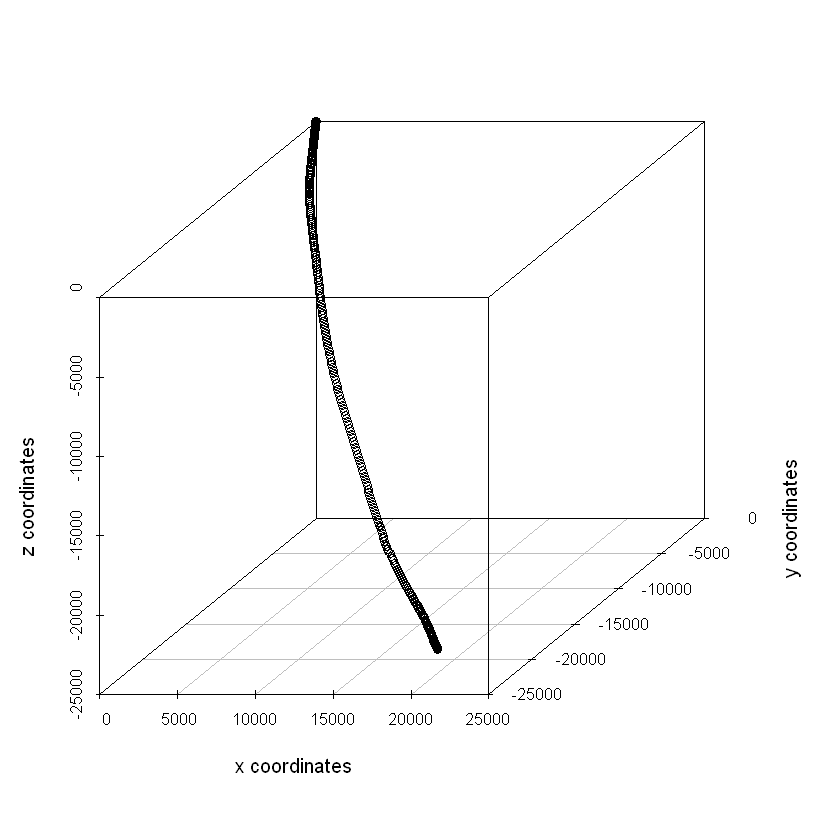

Class 7 instance 705 3D Gesture Visualization

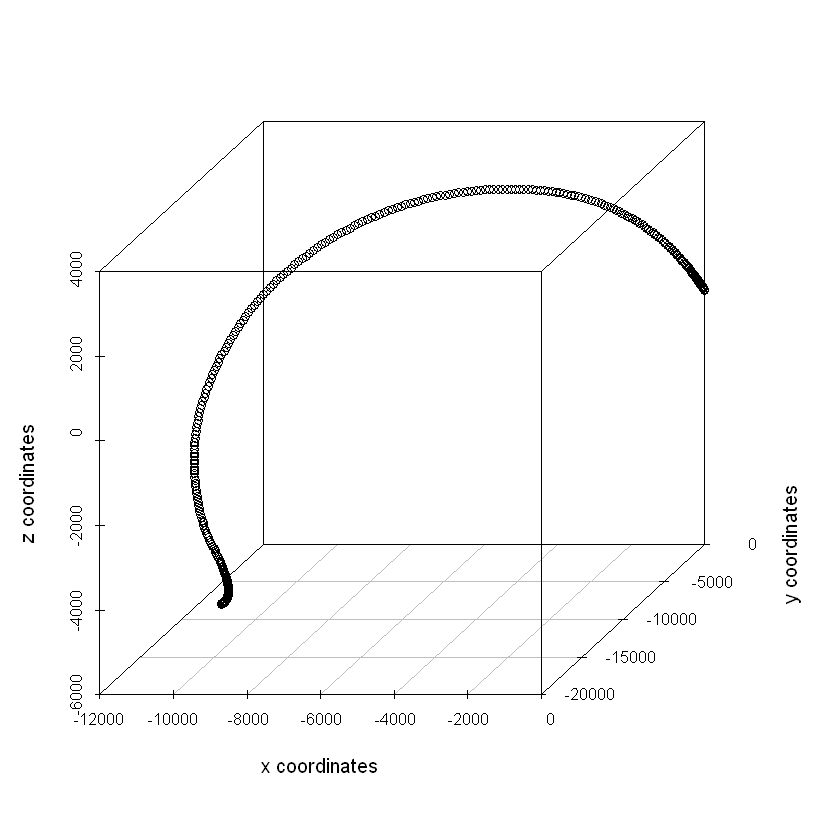

Class 8 instance 805 3D Gesture Visualization

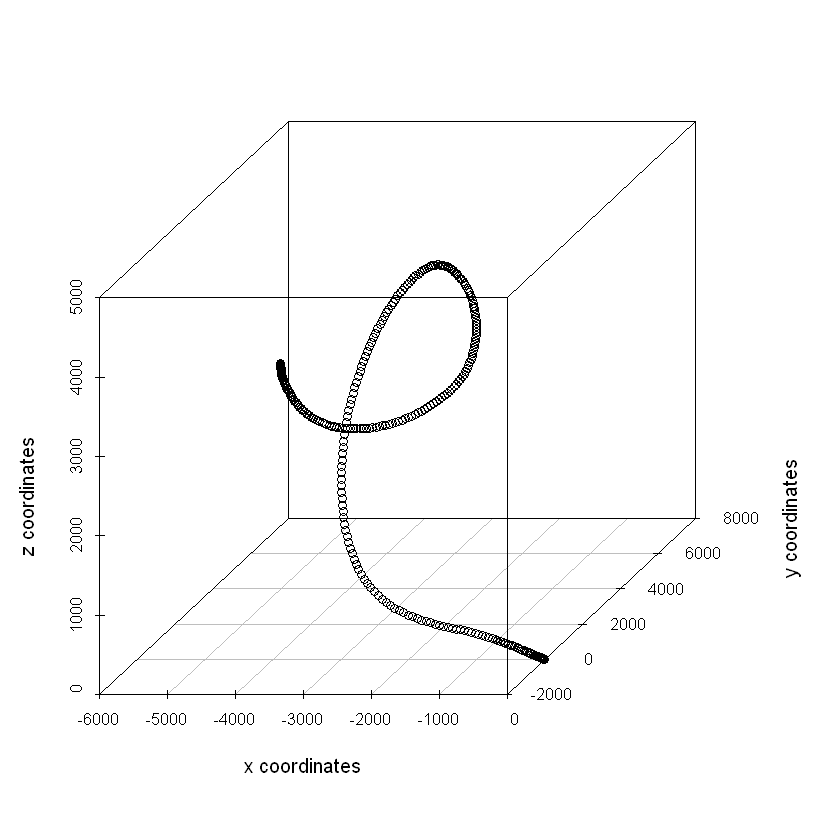

In [6]:
for(i in 1:8)
{
    scatterplot3d(x = long_gest[instance == 100*i + 5]$position.x
        , y = long_gest[instance == 100*i + 5]$position.y
        , z = long_gest[instance == 100*i + 5]$position.z
        , xlab = "x coordinates"
        , ylab = "y coordinates"
        , zlab = "z coordinates"
        , title = cat('Class ', long_gest[instance ==100*i+8]$class[1] , ' instance ', 100*i + 5, ' 3D Gesture Visualization', sep=''))
}

### Part 2
Two representation of gestures with few numbers is created. Simple statistich method for first representation. and Tree piecewise model is used for second representation.

In first representation distance to origin information is used and classes are seperated from each other with the mean of this distance to origin information. We can see that while some classes are far away from the origin, some are close to the origin.

In [28]:
distance_to_origin <- function(x,y,z){
    return((x^2*y^2*z^2)^0.5)
}

In [29]:
long_gest[,distance_to_origin:=distance_to_origin(position.x,position.y,position.z)]
long_gest[,mean_distance_to_origin:=mean(distance_to_origin),by = list(instance,class)]


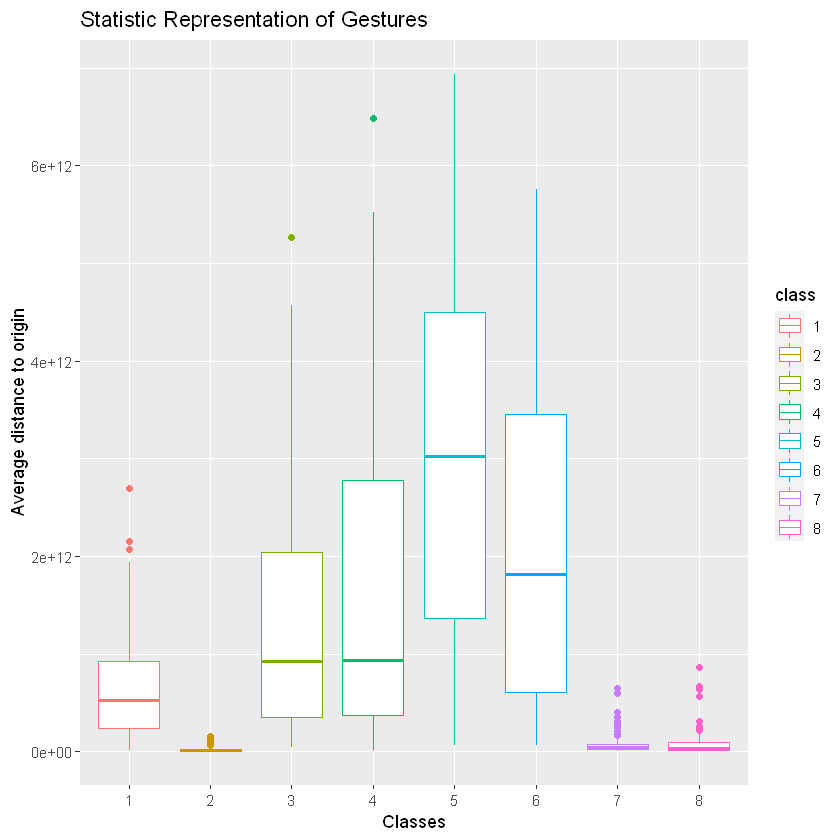

In [37]:
ggplot(long_gest, aes(x=class, y=mean_distance_to_origin, color=class)) +
  geom_boxplot() +
  labs(x = "Classes", y = "Average distance to origin", title = "Statistic Representation of Gestures")

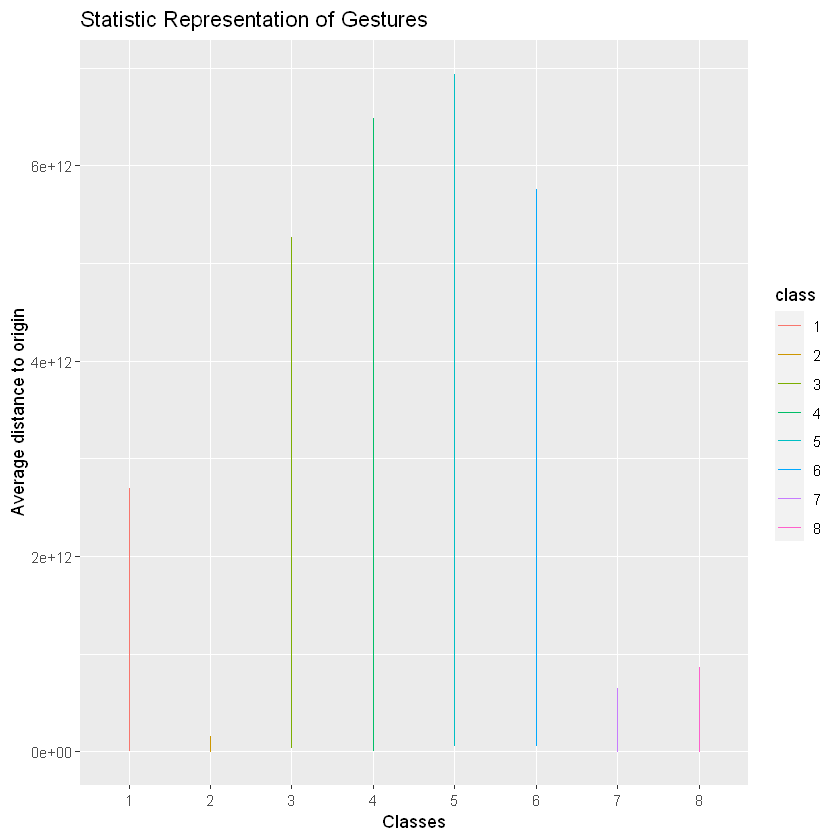

In [36]:
ggplot(long_gest, aes(x=class, y=mean_distance_to_origin, color=class)) +
  geom_line() +
  labs(x = "Classes", y = "Average distance to origin", title = "Statistic Representation of Gestures")

Tree piecewise model is used for the second representation. A tree model is fit to each axis position information and with this information. This method is only illustrated for first instance due to complex calculations but it can be used for each instance.

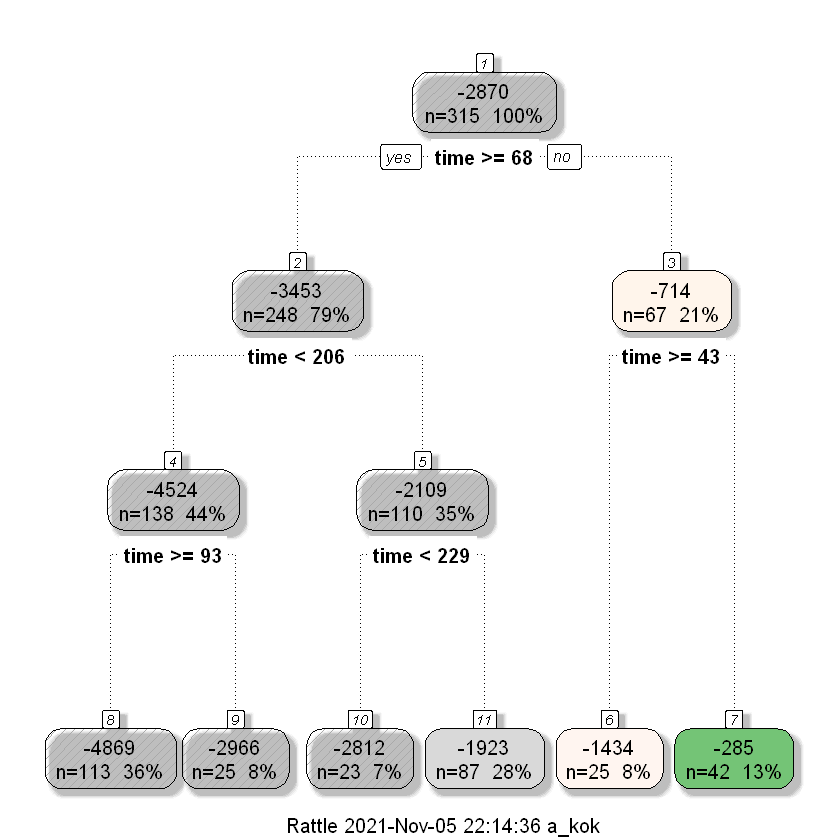

In [50]:
tree_train <- long_gest[instance == 1]
tree_fit_x <- rpart(position.x~time,tree_train,control = rpart.control(maxdepth = 3))
tree_fit_y <- rpart(position.y~time,tree_train,control = rpart.control(maxdepth = 3))
tree_fit_z <- rpart(position.z~time,tree_train,control = rpart.control(maxdepth = 3))

tree_train[,tree_rep_x:=predict(tree_fit_x,tree_train)]
tree_train[,tree_rep_y:=predict(tree_fit_y,tree_train)]
tree_train[,tree_rep_z:=predict(tree_fit_z,tree_train)]

data_plot=melt(tree_train,id.vars='time',measure.vars=c('position.x','tree_rep_x'))
data_plot[1:315,value.y:=tree_train$position.y]
data_plot[316:.N,value.y:=tree_train$tree_rep_y]
data_plot[1:315,value.z:=tree_train$position.z]
data_plot[316:.N,value.z:=tree_train$tree_rep_z]
data_plot[1:315,variable:="position"]
data_plot[316:.N,variable:="tree piecewise"]
fancyRpartPlot(tree_fit_x)

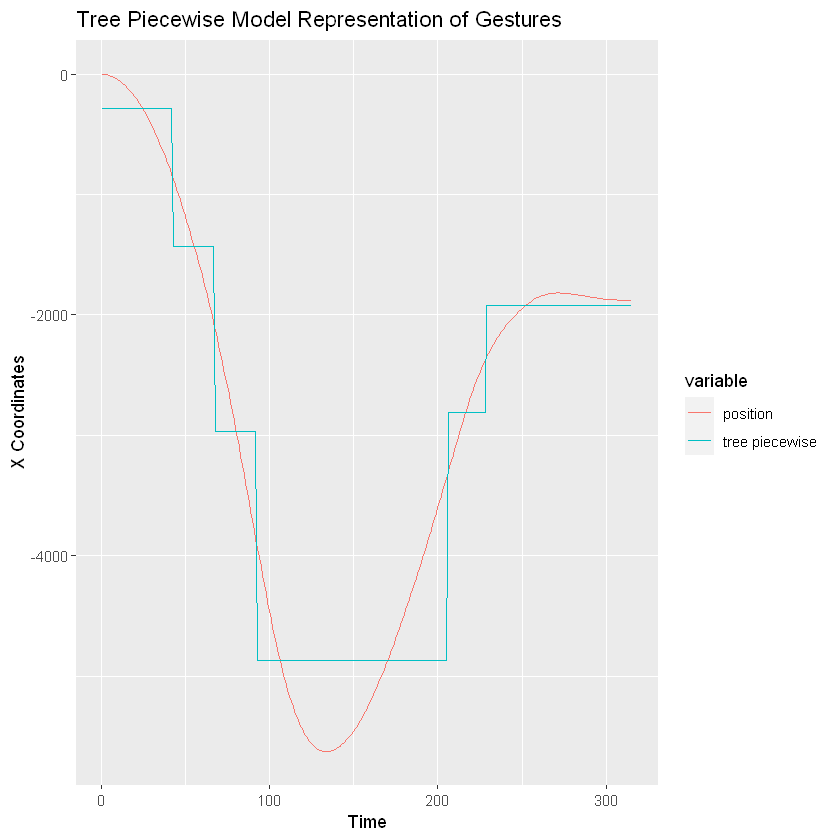

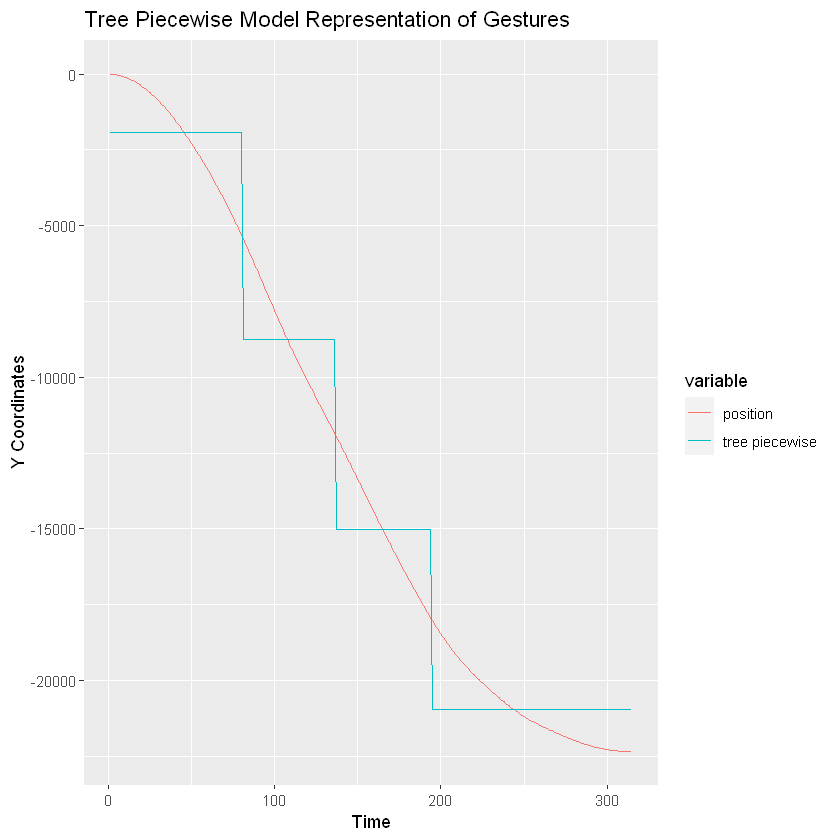

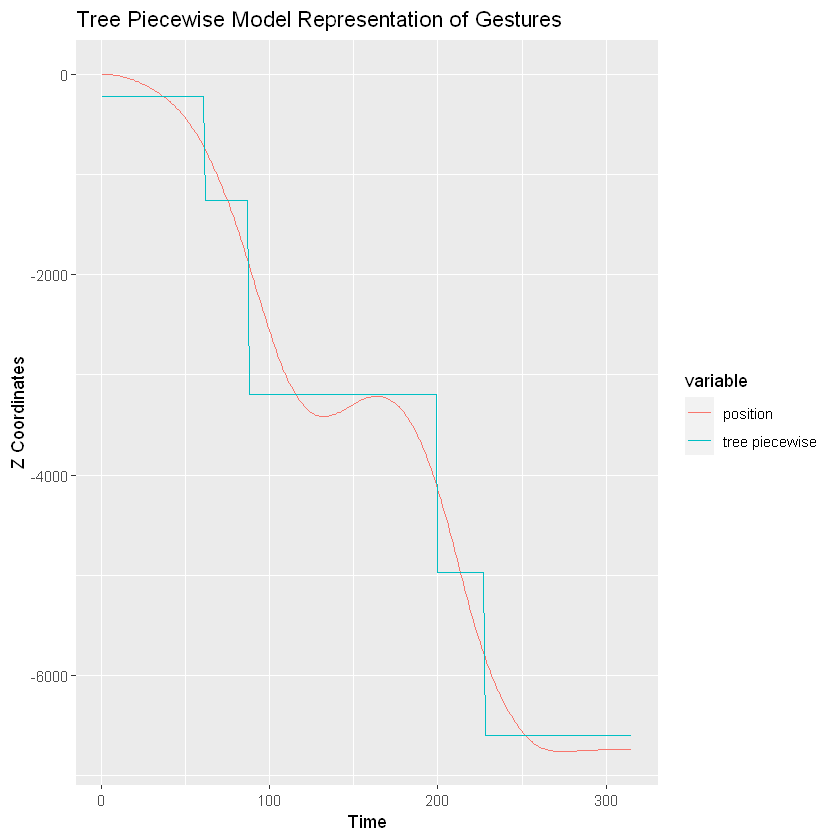

In [51]:
ggplot(data_plot, aes(x=time, y=value, color=variable)) +
  geom_line() +
  labs(x = "Time", y = "X Coordinates", title = "Tree Piecewise Model Representation of Gestures")

ggplot(data_plot, aes(x=time, y=value.y, color=variable)) +
  geom_line() +
  labs(x = "Time", y = "Y Coordinates", title = "Tree Piecewise Model Representation of Gestures")

ggplot(data_plot, aes(x=time, y=value.z, color=variable)) +
  geom_line() +
  labs(x = "Time", y = "Z Coordinates", title = "Tree Piecewise Model Representation of Gestures")

As we see, we have more information about the data with tree model piecewise representation but it has more complex calculations and visualizations. On the other hand simple statistich method is easy to calculate and still gives useful information. Also we can visualize simple statistichal model in 2D. I would choose tree piecewise representation because i choose to have more information about dataset.

To conclude, Gestures are visualized in 3D and matched to corresponded classes. With simple statistical and Tree piecewie models, two representations are done and one is chose by justifying the cause.